In [1]:
import isopy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
from matplotlib.axes import Axes
import ipywidgets as widgets
from datetime import datetime
from PIL import Image
import io

In [2]:
def make_image(results, zmin, zmax):
    plt.clf()
    axes = isopy.tb.create_subplots(plt, ['p0 p1 p2 p3 p4 p5 colorbar'.split()], figure_width = 18, figure_height=3, gridspec_width_ratios = [1,1,1,1,1,1,0.1])
    colorbar = axes[f'colorbar']
    
    for result in results:
        subplot, keys, sp1_key, sp2_key, grid = result
        subplot = axes[subplot]
        xlabel = 'double spike proportion'
        ylabel = f'{sp1_key.mass_number} spike in {sp1_key.mass_number}, {sp2_key.mass_number} double spike'
        title = f'{keys[0].mass_number}, {keys[1].mass_number}, {keys[2].mass_number} & {keys[3].mass_number} inversion'

        isopy.tb.plot_grid(subplot, *grid.xyz(isopy.nansd), zmin=zmin, zmax=zmax, axes_xlabel=xlabel, axes_ylabel=ylabel, axes_title=title, colorbar=colorbar)
        colorbar = False

    save = io.BytesIO()
    plt.savefig(save, format='png')
    return Image.open(save)

In [3]:
calcprog = widgets.IntProgress(value=0, min=0, max = 1)
display(calcprog)

def calc_ds(element, fixed_voltage, fixed_key, use_fixed_key):
    images1 = []
    images2 = []
    images5 = []
    fixed_values = isopy.tb.make_ms_array(element, mf_factor=2).normalise(fixed_voltage, fixed_key)
    all_isotopes = isopy.refval.element.isotopes[element]
    
    t0 = datetime.now()

    all_spikes = {}
    for isotope in all_isotopes:
        sp = isopy.zeros(None, keys=all_isotopes)
        sp[isotope] = 1
        all_spikes[isotope] = sp

    isotope_combinations = list(itertools.combinations(all_isotopes, 4))
    calcprog.value=0
    calcprog.max = len(isotope_combinations) * 7 + 1
    calcprog.description = f'calc ({calcprog.max})'
    

    for r, keys in enumerate(isotope_combinations):
        keys = isopy.askeylist(keys)
        results = []
        for i, (sp1_key, sp2_key) in enumerate(itertools.combinations(keys, 2)):
            sp1 = all_spikes[sp1_key]
            sp2 = all_spikes[sp2_key]

            if use_fixed_key:
                fx_key = (keys - sp1_key - sp2_key)[0] #Use first unspiked isotope
                fx_voltage = fixed_values[fx_key]
                results.append( (f'p{i}', keys, sp1_key, sp2_key, isopy.tb.ds_grid(element, sp1, sp2, fixed_voltage = fx_voltage, fixed_key=fx_key, inversion_keys = keys)) )
            else:
                results.append( (f'p{i}', keys, sp1_key, sp2_key, isopy.tb.ds_grid(element, sp1, sp2, fixed_voltage = fixed_voltage, inversion_keys = keys)) )
            
            calcprog.value += 1
        
        images1.append(make_image(results, 0, 0.01))
        images2.append(make_image(results, 0, 0.02))
        images5.append(make_image(results, 0, 0.05))
                                     
        calcprog.value += 1
        
    if use_fixed_key:
        extension = f'fixed{str(fixed_voltage).replace(".", "p")}'
    else:
        extension = f'sum{str(fixed_voltage).replace(".", "p")}'
    
    image = Image.new(images1[0].mode, (images1[0].width, sum([im.height for im in images1])))
    for i, im in enumerate(images1): image.paste(im, (0, im.height*i))
    image.save(f'{element}_0p01_{extension}.png')
    
    image = Image.new(images2[0].mode, (images2[0].width, sum([im.height for im in images2])))
    for i, im in enumerate(images2): image.paste(im, (0, im.height*i))
    image.save(f'{element}_0p02_{extension}.png')
    
    image = Image.new(images5[0].mode, (images5[0].width, sum([im.height for im in images5])))
    for i, im in enumerate(images5): image.paste(im, (0, im.height*i))
    image.save(f'{element}_0p05_{extension}.png')
    
    calcprog.value += 1
                                     
    print(f'{element} {extension}: Calculated {len(isotope_combinations)*6} grids in {datetime.now() - t0}')

IntProgress(value=0, max=1)

IntProgress(value=0, max=66)

Sn


c:\users\matti\dropbox\python\isopy\isopy\toolbox\doublespike.py:242: RuntimeWarning: invalid value encountered in log
  Fins[i1, 2] = np.log(MS[z] / MT[z]) / np.log(Mass[z])
c:\users\matti\dropbox\python\isopy\isopy\toolbox\doublespike.py:262: RuntimeWarning: invalid value encountered in log
  Fnat[i1, z] = np.log(SA[i1, z] / ST[z]) / np.log(Mass[z])
c:\users\matti\dropbox\python\isopy\isopy\toolbox\doublespike.py:240: RuntimeWarning: invalid value encountered in log
  Fins[i1, 0] = np.log(MS[x] / MT[x]) / np.log(Mass[x])
c:\users\matti\dropbox\python\isopy\isopy\toolbox\doublespike.py:241: RuntimeWarning: invalid value encountered in log
  Fins[i1, 1] = np.log(MS[y] / MT[y]) / np.log(Mass[y])
c:\users\matti\dropbox\python\isopy\isopy\toolbox\doublespike.py:260: RuntimeWarning: invalid value encountered in log
  Fnat[i1, x] = np.log(SA[i1, x] / ST[x]) / np.log(Mass[x])
c:\users\matti\dropbox\python\isopy\isopy\toolbox\doublespike.py:261: RuntimeWarning: invalid value encountered in lo

Sn sum10: Calculated 1260 grids in 1:56:42.236195


c:\users\matti\dropbox\python\isopy\isopy\toolbox\doublespike.py:242: RuntimeWarning: divide by zero encountered in true_divide
  Fins[i1, 2] = np.log(MS[z] / MT[z]) / np.log(Mass[z])
c:\users\matti\dropbox\python\isopy\isopy\toolbox\doublespike.py:215: RuntimeWarning: invalid value encountered in true_divide
  a = (ST[y] * (SA[i1, z] - SP[z]) + SA[i1, y] * (SP[z] - ST[z]) + SP[y] * (
c:\users\matti\dropbox\python\isopy\isopy\toolbox\doublespike.py:219: RuntimeWarning: invalid value encountered in true_divide
  b = (ST[x] * (SA[i1, z] - SP[z]) + SA[i1, x] * (SP[z] - ST[z]) + SP[x] * (
c:\users\matti\dropbox\python\isopy\isopy\toolbox\doublespike.py:251: RuntimeWarning: invalid value encountered in true_divide
  d = (ST[z] - SA[i1, z]) / (ST[x] - SA[i1, x])
c:\users\matti\dropbox\python\isopy\isopy\toolbox\doublespike.py:253: RuntimeWarning: invalid value encountered in true_divide
  f = (ST[z] - SA[i1, z]) / (ST[y] - SA[i1, y])


Sn fixed10: Calculated 1260 grids in 1:55:48.906679
Te
Te sum10: Calculated 420 grids in 0:34:12.555620
Te fixed10: Calculated 420 grids in 0:33:55.203846
Xe
Xe sum10: Calculated 756 grids in 1:06:02.398015
Xe fixed10: Calculated 756 grids in 1:05:35.621863
Ba
Ba sum10: Calculated 210 grids in 0:15:52.124690
Ba fixed10: Calculated 210 grids in 0:15:50.810907
Ce
Ce sum10: Calculated 6 grids in 0:00:21.411144
Ce fixed10: Calculated 6 grids in 0:00:21.193631
Nd
Nd sum10: Calculated 210 grids in 0:15:53.592108
Nd fixed10: Calculated 210 grids in 0:15:46.919624
Sm
Sm sum10: Calculated 210 grids in 0:15:52.482303
Sm fixed10: Calculated 210 grids in 0:15:47.173074
Gd
Gd sum10: Calculated 210 grids in 0:15:50.816461
Gd fixed10: Calculated 210 grids in 0:15:45.115660
Dy
Dy sum10: Calculated 210 grids in 0:15:49.698311
Dy fixed10: Calculated 210 grids in 0:15:41.192900
Er
Er sum10: Calculated 90 grids in 0:06:22.086527
Er fixed10: Calculated 90 grids in 0:06:19.118705
Yb
Yb sum10: Calculated 210

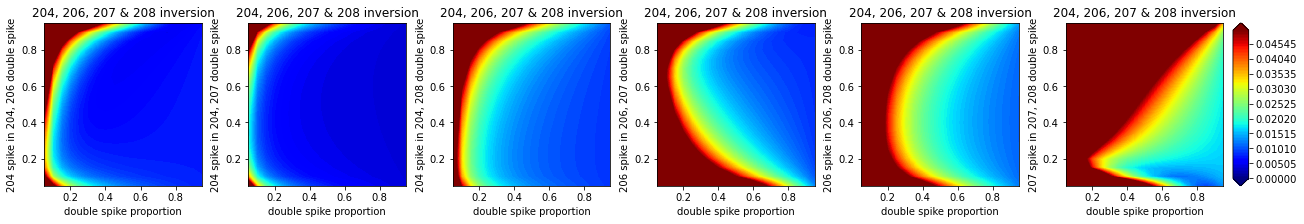

In [4]:
fixed_voltage = 10
fixed_key = None

all_elements = []
for element, isotopes in isopy.refval.element.isotopes.items():
    if len(isotopes) >= 4: all_elements.append(element)
        
progress = widgets.IntProgress(value=0, min=0, max = len(all_elements)*2)
display(progress)

for element in all_elements:
    if isopy.refval.element.atomic_number[element] < 50: 
        progress.value += 2
        continue
        
    print(f'{element}')
    calc_ds(element, fixed_voltage, fixed_key, False)
    progress.value += 1
    calc_ds(element, fixed_voltage, fixed_key, True)
    
    progress.value += 1
plt.clf() #Otherwise the last plot created is shown.